In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import scipy.io as sio
from sklearn import preprocessing

import gradient
import dataset
import computations
import layer
#from layer import Linear, Softmax, Gradient
import network

import datetime
import time

In [2]:
np.random.seed(400)
np.seterr(over='raise');
plt.rcParams['figure.figsize'] = (15.0, 5.0)

In [3]:
network1 = network.Network()
cifar = dataset.CIFAR_IMAGES()
#asgn1.test_batch_images(cifar_batch1)

In [4]:
#### Exercise - 1 ###
# Read in the data & initialize the parameters of the network
filePathLocal_labels = 'Dataset/batches.meta'
filePathLocal_batch = 'Dataset/data_batch_1'
filePathLocal_data_TRAIN = 'Dataset/data_batch_1'
filePathLocal_data_VALIDATION = 'Dataset/data_batch_2'
filePathLocal_data_TEST = 'Dataset/test_batch'

filePathList = (filePathLocal_data_TRAIN, filePathLocal_data_VALIDATION, filePathLocal_data_TEST)

# Read TRAIN, VALIDATION, TEST data into numpy arrays (numpy.ndarray) from local files
network1.ReadData(cifar, filePathList)
# X = (d, N), Y = (K, N), y = (N,)   # N=number of total images in X
# X = (3072, 10000), Y = (10, 10000), y = (10000,)

# Find the MEAN and STD of trainX and broadcast them for matrix calculations
# trainX_Broadcast_MeanStd = (mean_train_X_broadcast, std_train_X_broadcast)
trainX_Broadcast_MeanStd = network1.MeanStd_Train_X(network1.train_X)

# MEL
# Transform the INPUT to have zero mean ** Check that one if we need to transfer all of them separately or
# only having the normalization as in here??
# Normalize all INPUT data by using MEAN and STD of TRAIN DATA
train_X_Norm = network1.NormalizeData(network1.train_X, trainX_Broadcast_MeanStd)
validation_X_Norm = network1.NormalizeData(network1.validation_X, trainX_Broadcast_MeanStd)
test_X_Norm = network1.NormalizeData(network1.test_X, trainX_Broadcast_MeanStd)

# mu = 0; d = network1.train_X.shape[0]; m = 50; K = network1.train_Y.shape[0]
# we will use only 20 of 3072 to have a dimension reduction in comparing grad_analytic and grad_Numerical
mu = 0; d = 20; m = 50; K = network1.train_Y.shape[0]

initial_sizes = (mu, d, m, K)

sigma1 = 1 / int(np.sqrt(d))
sigma2 = 1 / np.sqrt(m)

# Generate W1, W2, b1, b2 matrices with initial values
#(W1, W2, b1, b2) = network1.Initialize_W_b(d, m, K, sigma1, sigma2)
(W1, W2, b1, b2) = network1.Initialize_W_b(initial_sizes, sigma1, sigma2)
# W1 = (50, 3072), W2 = (10, 50), b1 = (50, 1), b2 = (10, 1) # if we use the whole dimensions/features
# W1 = (50, 20), W2 = (10, 50), b1 = (50, 1), b2 = (10, 1) # if we use 20 dimensions/features
# W1 = (m, d), W2 = (K, m), b1 = (m, 1), b2 = (K, 1)

In [6]:
'''
print("Mean-STD:\n trainX_Broadcast_MeanStd[0]=\n{}\n\ntrainX_Broadcast_MeanStd[1]=\n{}".\
      format(trainX_Broadcast_MeanStd[0], trainX_Broadcast_MeanStd[1]))
print("\n\nMean-STD:\n train_X_Norm.mean(axis=1)={}\n\n".format(train_X_Norm.mean(axis=1)))
'''
print("Shape check:\n train_X_Norm={}\t validation_X_Norm={}\t test_X_Norm={}".format(train_X_Norm.shape, validation_X_Norm.shape, test_X_Norm.shape))
print(" train_Y={}\t\t validation_Y={}\t\t test_Y={}".format(network1.train_Y.shape, network1.validation_Y.shape, network1.test_Y.shape))
print(" train_y={}\t\t validation_y={}\t\t\t test_y={}".format(network1.train_y.shape, network1.validation_y.shape, network1.test_y.shape))
print(" W1={}\t\t\t W2={}\t\t\t\t b1={}\t\t\t b2={}".format(W1.shape, W2.shape, b1.shape, b2.shape))

Shape check:
 train_X_Norm=(3072, 10000)	 validation_X_Norm=(3072, 10000)	 test_X_Norm=(3072, 10000)
 train_Y=(10, 10000)		 validation_Y=(10, 10000)		 test_Y=(10, 10000)
 train_y=(10000,)		 validation_y=(10000,)			 test_y=(10000,)
 W1=(50, 20)			 W2=(10, 50)				 b1=(50, 1)			 b2=(10, 1)


In [9]:
#### Exercise - 2 ###
# Compute the gradients for the network parameters

# only 20 features are used for gradient TEST calculations and 1 image from X (data) 
# 2 images only not the whole batch (10k images)
#X_batch = train_X_Norm[0:d, :]  # if we would like to test with the entire batch
# num_image = number of images to use in gradient comparison calculations 
num_image = 2
X_batch = train_X_Norm[0:d, 0:num_image]
Y_batch = network1.train_Y[:, 0:num_image]
y_batch = network1.train_y[0:num_image]

linearLayer1 = layer.Linear()
reluLayer = layer.ReLU()             # not an exact layer but operational step..
linearLayer2 = layer.Linear()
softmaxLayer = layer.Softmax()       # not an exact layer but operational step..
ReLUlayer = layer.ReLU()

layers = [linearLayer1, reluLayer, linearLayer2, softmaxLayer]

'''
S1 = linearLayer1.Forward(X_batch, W1, b1)
# h = X(layer_no) ... X(0)=represents the input
#S1_Norm = network1.NormalizeData(S1, trainX_Broadcast_MeanStd)
H = ReLUlayer.Forward(S1)
S = linearLayer1.Forward(H, W2, b2)
P = softmaxLayer.Forward(S)
'''
W = [W1, W2]
b = [b1, b2]

P, H = network1.EvaluationClassifier(layers, X_batch, W, b)


In [ ]:
#X_batch #S1 #W1 #W2 #H #S #P  #Y_batch.shape
#print(" S1={}\t\t\t H={}\t\t\t\t S={}\t\t\t P={}".format(S1.shape, H.shape, S.shape, P.shape))

In [ ]:
#exp_s = np.exp(S)
#print(exp_s)

In [10]:
def GradientComparison_Analytical_Numerical(X, H, Y, lambda_cost = 0, h = 1e-5):
    grad = gradient.Gradient()
    G = -np.subtract(Y, P) # only for 2 images (change num_image value if you want to use different # of images)
    N = Y_batch.shape[1]
    
    (grad_W2, grad_b2, G) = grad.ComputeGradients_Linear_HiddenLayer(N, G, H, lambda_cost, W2)
    
    G = reluLayer.Backward(G, H)
    N = H.shape[1]
    
    (grad_W1, grad_b1) = grad.ComputeGradients_Linear_FirstLayer(N, G, X_batch, lambda_cost, W1)
    
    start_time = datetime.datetime.now()

    W = [W1, W2]
    b = [b1, b2]
    #X_all = [X_batch, H]
    #(grad_W_num, grad_b_num) = grad.ComputeGradsNumSlow(layers, X_batch, Y_batch, W, b, lambda_cost, h=1e-5)
    (grad_W_num, grad_b_num) = grad.ComputeGradsNumSlow(X, Y, W, b, lambda_cost, h)

    grad_W1_num = grad_W_num[0]
    grad_W2_num = grad_W_num[1]

    grad_b1_num = grad_b_num[0]
    grad_b2_num = grad_b_num[1]

    end_time = datetime.datetime.now()

    print("Calculation time of GradsNumSlow: " + str(end_time - start_time))
    
    print('\n\n***** grad_W1, grad_W1_num')
    grad.CompareGradients_W(grad_W1, grad_W1_num)
    
    print('\n\n***** grad_W2, grad_W2_num')
    grad.CompareGradients_W(grad_W2, grad_W2_num)
    
    print('\n\n***** grad_b1, grad_b1_num')
    grad.CompareGradients_b(grad_b1, grad_b1_num)
    
    print('\n\n***** grad_b2, grad_b2_num')
    grad.CompareGradients_b(grad_b2, grad_b2_num)
    

In [11]:
GradientComparison_Analytical_Numerical(X_batch, H, Y_batch, lambda_cost = 0, h = 1e-5)

Calculation time of GradsNumSlow: 0:00:00.281658


***** grad_W1, grad_W1_num

grad_W_difference_MEAN = 7.498784920140537e-12
grad_W_difference_MIN = 0.0
grad_W_difference_MAX = 4.337517844898997e-11

grad_W_MIN = 0.0
grad_W_num_MIN = 0.0
grad_W_MAX = 0.2635995440633545
grad_W_num_MAX = 0.26359954405918984


***** grad_W2, grad_W2_num

grad_W_difference_MEAN = 7.0154391063753655e-12
grad_W_difference_MIN = 0.0
grad_W_difference_MAX = 3.136581879642497e-11

grad_W_MIN = 0.0
grad_W_num_MIN = 0.0
grad_W_MAX = 0.7258631117130598
grad_W_num_MAX = 0.7258631117057489


***** grad_b1, grad_b1_num

grad_b_difference_MEAN = 6.43581828455031e-12
grad_b_difference_MIN = 0.0
grad_b_difference_MAX = 2.5323042274205676e-11

grad_b_MIN = 0.0
grad_b_num_MIN = [0.]

grad_b_MAX = 0.23249957421100545
grad_b_num_MAX = [0.23249957]


***** grad_b2, grad_b2_num

grad_b_difference_MEAN = 1.4170990769724057e-11
grad_b_difference_MIN = 7.311790062303203e-13
grad_b_difference_MAX = 2.2255294829243155e-11

grad_b

In [14]:
def GradientSanityCheck(network1, train_X_Norm):
    n_epocs = 200    # number of times we will iterate on the entire data (10K images in our case)
    n_batch = 100    # the size of the mini-batch. in other words, number of images in 1 mini-batch.
    eta = 0.001      # learning rate (step-size)
    lambda_cost = 0  # regularization coefficient (punishment)
    #d = train_X_Norm.shape[0]
    d = 3072
    m = 50           # number of nodes in the hidden layer
    K = network1.train_Y.shape[0]  # number of classes

    # Generate W1, W2, b1, b2 matrices with initial values
    # (W1, W2, b1, b2) = network1.Initialize_W_b(d, m, K)
    sigma1 = 1 / int(np.sqrt(d))
    sigma2 = 1 / np.sqrt(m)
    #(W1, W2, b1, b2) = network1.Initialize_W_b(d, m, K, sigma1, sigma2)
    initial_sizes = [0, d, m, K]
    (W1, W2, b1, b2) = network1.Initialize_W_b(initial_sizes, sigma1, sigma2)

    W = [W1, W2]
    b = [b1, b2]

    J_epocs_train = np.zeros(n_epocs)         # cost array     - will keep costs per epoc (iteration)
    Accuracy_epocs_train = np.zeros(n_epocs)  # accuracy array - will keep accuracy per epoc (iteration)

    linearLayer1 = layer.Linear()
    reluLayer = layer.ReLU()             # not an exact layer but operational step..
    linearLayer2 = layer.Linear()
    softmaxLayer = layer.Softmax()       # not an exact layer but operational step..
    ReLUlayer = layer.ReLU()
    grad = gradient.Gradient()

    layers = [linearLayer1, reluLayer, linearLayer2, softmaxLayer]
    # total_batch = how many mini-batches will we need to cover the entire training set?
    #total_batch = int(train_X_normalized.shape[1] / n_batch)
    #n_sanity_batch = 1
    # we will only use 100 images for sanity check that means there will be only 1 mini-batch
    n_sanity_batch = 1
    n_test_images = n_batch * n_sanity_batch

    start_time = datetime.datetime.now()
    for e in range(n_epocs):
        for batch in range(n_sanity_batch):
            index_list = list(range(batch * n_batch, (batch + 1) * n_batch))
            # shuffling is not necessary but good to have
            #np.random.shuffle(index_list)
            #X_batch = train_X_Norm[:, index_list]
            X_batch = train_X_Norm[0:d, index_list]
            Y_batch = network1.train_Y[:, index_list]

            P, H = network1.EvaluationClassifier(layers, X_batch, W, b)

            G2 = -np.subtract(network1.train_Y[:, index_list], P)
            N2 = Y_batch.shape[1] #N

            # N, G
            (grad_W2, grad_b2, G1) = grad.ComputeGradients_Linear_HiddenLayer(N2, G2, H, lambda_cost, W2) 
            G0 = reluLayer.Backward(G1, H)
            N1 = H.shape[1] #N
            # N, G
            (grad_W1, grad_b1) = grad.ComputeGradients_Linear_FirstLayer(N1, G0, X_batch, lambda_cost, W1)

            W1 = W1 - eta * grad_W1
            W2 = W2 - eta * grad_W2

            #W1 = Wstar1
            #W2 = Wstar2

            bstar_m1 = b1 - eta * grad_b1
            b1 = bstar_m1[:, :1]
            #b1 = bstar1

            bstar_m2 = b2 - eta * grad_b2
            b2 = bstar_m2[:, :1]
            #b2 = bstar2

        W = [W1, W2]
        b = [b1, b2]

        #J_train = network1.Cost(X_batch, Y_batch, W, b, lambda_cost)
        #J_train = network1.Cost(train_X_Norm[:, 0:], Y_batch, W, b, lambda_cost)
        #J_train = network1.Cost(train_X_Norm[:, :batch*total_batch], network1.train_y[index_list],\
         #                       W, b, lambda_cost)
        J_train = network1.Cost(train_X_Norm[0:d, 0:n_test_images], network1.train_Y[:, 0:n_test_images],\
                                W, b, lambda_cost)

        J_epocs_train[e] = J_train

        #P_train = self.EvaluationClassifier(train_X_normalized, W, b)
        #k_train = np.argmax(P, axis=0)

        P, H = network1.EvaluationClassifier(layers, train_X_Norm[0:d, 0:n_test_images], W, b)
        k_train = np.argmax(P, axis=0)

        A_train = network1.ComputeAccuracy(k_train, network1.train_y[0:n_test_images])
        Accuracy_epocs_train[e] = A_train

        #self.Plot_Train_Validation_Cost_Accurracy(J_epocs_train, Accuracy_epocs_train)

    end_time = datetime.datetime.now()
    
    print("Calculation time of GradientSanityCheck: " + str(end_time - start_time))
    ## d = 20,   N=100    >>> Cost from 2.54  to 2.38    >>> Accuracy from 0.08 to 0.15    >> time: 0.15 seconds
    ## d = 3072, N=100    >>> Cost from 2.439 to 1.199   >>> Accuracy from 0.15 to 0.74    >> time: 1.23 seconds
    ## d = 3072, N=10000  >>> Cost from 2.347 to 1.323   >>> Accuracy from 0.1906 to 0.543 >> time: 3.08 minutes
        
    print(J_epocs_train)
    print(Accuracy_epocs_train)

In [15]:
GradientSanityCheck(network1, train_X_Norm)

Calculation time of GradientSanityCheck: 0:00:01.201983
[2.55380296 2.53524713 2.51718851 2.4993236  2.48197084 2.46554142
 2.44942676 2.43362788 2.41797715 2.40268536 2.38772576 2.3730295
 2.35869244 2.34461564 2.33082873 2.31737637 2.30413838 2.29122966
 2.27863607 2.26627513 2.25408216 2.24209495 2.23036727 2.21890506
 2.20772748 2.1965689  2.1856394  2.17492726 2.16457035 2.15442571
 2.14446768 2.13454968 2.12472774 2.11509406 2.10555648 2.09614715
 2.08689499 2.07783091 2.06882459 2.05985753 2.05100438 2.0423115
 2.03376725 2.02532367 2.01692126 2.0086461  2.0005012  1.99243528
 1.98446136 1.9765305  1.9687653  1.96105088 1.95342841 1.94586518
 1.93835283 1.93088714 1.92341429 1.91598751 1.9086534  1.90140604
 1.89426404 1.88713292 1.87995041 1.87275721 1.8656458  1.85854804
 1.85146545 1.8445076  1.83755694 1.83068339 1.82383675 1.81713253
 1.81047893 1.80386319 1.79730604 1.790778   1.78426886 1.77783719
 1.77146453 1.76514501 1.75882702 1.75259933 1.74641695 1.74028563
 1.73426

In [16]:
def Vanilla_MiniBacth_GD(network1, train_X_Norm):
    # GradientSanityCheck_FullTraining(network1, train_X_Norm)
    # This one is called "Vanilla mini-batch gradient descent"
    n_epocs = 200    # number of times we will iterate on the entire data (10K images in our case)
    n_batch = 100    # the size of the mini-batch. in other words, number of images in 1 mini-batch.
    eta = 0.001      # learning rate (step-size)
    #eta = 0.001     # MEL: If I use an eta bigger than 1e-3, I receive an overflow error for SOFTMAX
    lambda_cost = 0  # regularization coefficient (punishment)
    #lambda_cost = 0.01
    d = train_X_Norm.shape[0]
    m = 50 
    K = network1.train_Y.shape[0]  # number of classes

    # Generate W1, W2, b1, b2 matrices with initial values
    # (W1, W2, b1, b2) = network1.Initialize_W_b(d, m, K)
    sigma1 = 1 / int(np.sqrt(d))
    sigma2 = 1 / np.sqrt(m)
    #(W1, W2, b1, b2) = network1.Initialize_W_b(d, m, K, sigma1, sigma2)
    initial_sizes = [0, d, m, K]
    (W1, W2, b1, b2) = network1.Initialize_W_b(initial_sizes, sigma1, sigma2)

    W = [W1, W2]
    b = [b1, b2]

    J_epocs_train = np.zeros(n_epocs)         # cost array     - will keep costs per epoc (iteration)
    Accuracy_epocs_train = np.zeros(n_epocs)  # accuracy array - will keep accuracy per epoc (iteration)

    linearLayer1 = layer.Linear()
    reluLayer = layer.ReLU()             # not an exact layer but operational step..
    linearLayer2 = layer.Linear()
    softmaxLayer = layer.Softmax()       # not an exact layer but operational step..
    ReLUlayer = layer.ReLU()
    grad = gradient.Gradient()

    layers = [linearLayer1, reluLayer, linearLayer2, softmaxLayer]
    # total_batch = how many mini-batches will we need to cover the entire training set?
    total_batch = int(train_X_Norm.shape[1] / n_batch)
    #n_sanity_batch = 1
    # we will only use 100 images for sanity check that means there will be only 1 mini-batch
    #n_sanity_batch = 1
    #n_test_images = n_batch * n_sanity_batch

    start_time = datetime.datetime.now()
    for e in range(n_epocs):
        for batch in range(total_batch):
            index_list = list(range(batch * n_batch, (batch + 1) * n_batch))
            # shuffling is not necessary but good to have
            #np.random.shuffle(index_list)
            #X_batch = train_X_Norm[:, index_list]
            X_batch = train_X_Norm[:, index_list]
            Y_batch = network1.train_Y[:, index_list]

            P, H = network1.EvaluationClassifier(layers, X_batch, W, b)

            G2 = -np.subtract(network1.train_Y[:, index_list], P)  # G
            N2 = Y_batch.shape[1] #N

            # N, G
            (grad_W2, grad_b2, G1) = grad.ComputeGradients_Linear_HiddenLayer(N2, G2, H, lambda_cost, W2) 
            G0 = reluLayer.Backward(G1, H)
            N1 = H.shape[1] #N
            # N, G
            (grad_W1, grad_b1) = grad.ComputeGradients_Linear_FirstLayer(N1, G0, X_batch, lambda_cost, W1)

            # W1star, W2star
            W1 = W1 - eta * grad_W1
            W2 = W2 - eta * grad_W2

            # b1star, b2star
            bstar_m1 = b1 - eta * grad_b1
            b1 = bstar_m1[:, :1]  # there's a broadcast issue needs to be fixed, that's why we pick only 1 column

            bstar_m2 = b2 - eta * grad_b2
            b2 = bstar_m2[:, :1]  # broadcast issue, this is a quick workaround - use 1 column

        W = [W1, W2]
        b = [b1, b2]

        J_train = network1.Cost(train_X_Norm, network1.train_Y, W, b, lambda_cost)

        J_epocs_train[e] = J_train

        P, H = network1.EvaluationClassifier(layers, train_X_Norm, W, b)
        k_train = np.argmax(P, axis=0)

        A_train = network1.ComputeAccuracy(k_train, network1.train_y)
        Accuracy_epocs_train[e] = A_train

        #self.Plot_Train_Validation_Cost_Accurracy(J_epocs_train, Accuracy_epocs_train)

    end_time = datetime.datetime.now()
    
    print("Calculation time of GradientSanityCheck: " + str(end_time - start_time))
        
    print(J_epocs_train)
    print(Accuracy_epocs_train)

In [17]:
#GradientSanityCheck_FullTraining(network1, train_X_Norm)
Vanilla_MiniBacth_GD(network1, train_X_Norm)

Calculation time of GradientSanityCheck: 0:03:07.259736
[2.32395474 2.38767912 2.59680203 2.39921842 2.53748183 2.86958192
 2.64950141 2.46929949 2.14840156 2.18581027 2.22206969 2.16970372
 2.12856726 2.06567802 2.00825304 1.88389083 1.83295867 1.81637206
 1.81169838 1.81377362 1.7370321  1.72205042 1.71417657 1.72156703
 1.69866571 1.70509758 1.68070043 1.68334299 1.66422736 1.66593578
 1.64997336 1.65113475 1.63746852 1.63927479 1.62866354 1.63398404
 1.6272772  1.63655377 1.63837112 1.65029328 1.65977744 1.65486007
 1.6575978  1.63193814 1.62502984 1.60645711 1.60370161 1.59380258
 1.59127473 1.58683084 1.58270479 1.58010699 1.57805884 1.57202003
 1.57135779 1.56193692 1.56144526 1.55257221 1.5529011  1.54563745
 1.54665652 1.53892851 1.53869491 1.53126895 1.52931197 1.52196794
 1.51881061 1.51268419 1.50885727 1.50381933 1.49999458 1.49633416
 1.49264987 1.49030579 1.48667393 1.48507392 1.48186601 1.48094388
 1.47753446 1.47684689 1.47335934 1.47272041 1.46957409 1.46856607
 1.466

In [22]:
def Train_Cyclical(network1, train_X_Norm, validation_X_Norm):
    '''
    Up until now, we have trained our networks with Vanilla mini-batch gradient descent. 
    To help speed up training times and avoid time-consuming searches for good values of eta, we will now
    implement mini-batch-GD training where the learning rate at each update step is defined in a cylical way
    check equations (14) and (15) in the assignment.
    '''
    #n_epocs = 200      # number of times we will iterate on the entire data (10K images in our case)
    n_batch = 100       # the size of the mini-batch. in other words, number of images in 1 mini-batch.
    eta = 0.001         # learning rate (step-size)
    lambda_cost = 0.01  # regularization coefficient (punishment)
    d = train_X_Norm.shape[0]
    m = 50 
    K = network1.train_Y.shape[0]  # number of classes
    eta_min = 1e-5
    #eta_max = 1e-1  
    eta_max = 2e-2  # MEL: If I use an eta bigger than 2e-2, I receive an overflow error for SOFTMAX 
    n_steps = 500                  # number of steps in half a cycle (from eta_min to eta_max) 

    # Generate W1, W2, b1, b2 matrices with initial values
    # (W1, W2, b1, b2) = network1.Initialize_W_b(d, m, K)
    sigma1 = 1 / int(np.sqrt(d))
    sigma2 = 1 / np.sqrt(m)
    #(W1, W2, b1, b2) = network1.Initialize_W_b(d, m, K, sigma1, sigma2)
    initial_sizes = [0, d, m, K]
    (W1, W2, b1, b2) = network1.Initialize_W_b(initial_sizes, sigma1, sigma2)

    W = [W1, W2]
    b = [b1, b2]

    linearLayer1 = layer.Linear()
    reluLayer = layer.ReLU()             # not an exact layer but operational step..
    linearLayer2 = layer.Linear()
    softmaxLayer = layer.Softmax()       # not an exact layer but operational step..
    ReLUlayer = layer.ReLU()
    grad = gradient.Gradient()

    layers = [linearLayer1, reluLayer, linearLayer2, softmaxLayer]
    # total_batch = how many mini-batches will we need to cover the entire training set?
    total_batch = int(train_X_Norm.shape[1] / n_batch)
    
    # A full cycle once go up (from eta_min to eta_max) and once go down (from eta_max to eta_min)
    # so we multiply by 2
    n_cycles = 1   # corresponds to "L array" in 2.L.ns in the assignment .. 
    # L=the current cycle number ... n_cycles=the total number of cycles to be applied
    # so L is an element of n_cycle >> i.e. L = {0, 1, 2, 3} if n_cycles = 4 
    # n_epocs=10 for 1 full cycle having n_steps=500 and n_batch=100
    n_epocs = int(2 * n_cycles * (n_steps / total_batch))
    #n_sanity_batch = 1
    # we will only use 100 images for sanity check that means there will be only 1 mini-batch
    #n_sanity_batch = 1
    #n_test_images = n_batch * n_sanity_batch
    
    #J_epocs_train = np.zeros(n_epocs)         # cost array     - will keep costs per epoc (iteration)
    #Accuracy_epocs_train = np.zeros(n_epocs)  # accuracy array - will keep accuracy per epoc (iteration)
    n_records = int(2 * n_cycles * n_steps / 10)
    J_epocs_train = np.zeros(n_records) # cost array     - will keep costs per epoc (iteration)
    Accuracy_epocs_train = np.zeros(n_records) # we will only record once in 10 iteration
    
    J_epocs_validation = np.zeros(n_records) # cost array     - will keep costs per epoc (iteration)
    Accuracy_epocs_validation = np.zeros(n_records) # we will only record once in 10 iteration

    # t = iteration number for eta (don't confuse with the epocs iteration!)
    t = 0
    # cycleID in use.. if n_cycles=0 then cycle max will be 0. else it will be incremented by 1 at each 2*n_steps
    cycle_no = 0
    n_records = 0
    start_time = datetime.datetime.now()
    for e in range(n_epocs):
        for batch in range(total_batch):
            #print('cycle_no: {}, e: {}, batch: {}, t: {}, eta: {}'.format(cycle_no, e, batch, t, eta))
            index_list = list(range(batch * n_batch, (batch + 1) * n_batch))
            # shuffling is not necessary but good to have
            np.random.shuffle(index_list)
            #X_batch = train_X_Norm[:, index_list]
            X_batch = train_X_Norm[:, index_list]
            Y_batch = network1.train_Y[:, index_list]

            P, H = network1.EvaluationClassifier(layers, X_batch, W, b)

            G2 = -np.subtract(network1.train_Y[:, index_list], P)  # G
            N2 = Y_batch.shape[1] #N

            # N, G
            (grad_W2, grad_b2, G1) = grad.ComputeGradients_Linear_HiddenLayer(N2, G2, H, lambda_cost, W2) 
            G0 = reluLayer.Backward(G1, H)
            N1 = H.shape[1] #N
            # N, G
            (grad_W1, grad_b1) = grad.ComputeGradients_Linear_FirstLayer(N1, G0, X_batch, lambda_cost, W1)
            
            if 2*cycle_no*n_steps <= t and t <= (2*cycle_no+1)*n_steps:
                eta = eta_min + (t - 2*cycle_no*n_steps)/n_steps*(eta_max-eta_min)
            elif (2*cycle_no+1)*n_steps <= t and t <= 2*(cycle_no+1)*n_steps:
                eta = eta_max - (t - (2*cycle_no+1)*n_steps)/n_steps*(eta_max-eta_min)
            
            # W1star, W2star
            W1 = W1 - eta * grad_W1
            W2 = W2 - eta * grad_W2

            # b1star, b2star
            bstar_m1 = b1 - eta * grad_b1
            b1 = bstar_m1[:, :1]  # there's a broadcast issue needs to be fixed, that's why we pick only 1 column

            bstar_m2 = b2 - eta * grad_b2
            b2 = bstar_m2[:, :1]  # broadcast issue, this is a quick workaround - use 1 column
            
            #print('cycle_no: {}, e: {}, batch: {}, t: {}, eta: {}'.format(cycle_no, e, batch, t, eta))
            
            # 12:43 if I calculate J for each t
            if t % 10 == 9:    
                W = [W1, W2]
                b = [b1, b2]

                J_train = network1.Cost(train_X_Norm, network1.train_Y, W, b, lambda_cost)

                J_epocs_train[n_records] = J_train

                P, H = network1.EvaluationClassifier(layers, train_X_Norm, W, b)
                k_train = np.argmax(P, axis=0)

                A_train = network1.ComputeAccuracy(k_train, network1.train_y)
                Accuracy_epocs_train[n_records] = A_train
            
                
                J_validation = network1.Cost(validation_X_Norm , network1.validation_Y, W, b, lambda_cost)

                J_epocs_validation[n_records] = J_validation

                P_val, H_val = network1.EvaluationClassifier(layers, validation_X_Norm, W, b)
                k_validation = np.argmax(P_val, axis=0)

                A_validation = network1.ComputeAccuracy(k_validation, network1.validation_y)
                Accuracy_epocs_validation[n_records] = A_validation
                n_records += 1
            
            t += 1
            if t%(2*n_steps) == 0:
                cycle_no += 1

        '''        
        W = [W1, W2]
        b = [b1, b2]

        J_train = network1.Cost(train_X_Norm, network1.train_Y, W, b, lambda_cost)

        J_epocs_train[e] = J_train

        P, H = network1.EvaluationClassifier(layers, train_X_Norm, W, b)
        k_train = np.argmax(P, axis=0)

        A_train = network1.ComputeAccuracy(k_train, network1.train_y)
        Accuracy_epocs_train[e] = A_train

        #self.Plot_Train_Validation_Cost_Accurracy(J_epocs_train, Accuracy_epocs_train)
        '''
        
        

    end_time = datetime.datetime.now()
    
    print("Calculation time of Train_Cyclical: " + str(end_time - start_time))
        
    #print('J_epocs_train: {}'.format(J_epocs_train))
    #print('Accuracy_epocs_train: {}'.format(Accuracy_epocs_train))
    
    Plot_Train_Validation_Cost_Accurracy(J_epocs_train, J_epocs_validation, Accuracy_epocs_train, Accuracy_epocs_validation)

In [18]:
#def Plot_Train_Validation_Cost_Accurracy(self, Cost_Train, Cost_Validation, Acc_Train, Acc_Validation):
def Plot_Train_Validation_Cost_Accurracy(Cost_Train, Cost_Validation, Acc_Train, Acc_Validation):
        plt.subplot(1,2,1)
        plt.plot(Cost_Train, 'g-', label='Train')
        plt.plot(Cost_Validation, 'r-', label='Validation')
        plt.title('Cost Comparison')
        plt.xlabel('Epoch')
        plt.ylabel('Cost')
        plt.legend()
        plt.grid('on')
        
        plt.subplot(1,2,2)
        plt.plot(Acc_Train, 'g-', label='Train')
        plt.plot(Acc_Validation, 'r-', label='Validation')
        plt.title('Accuracy Comparison')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid('on')

Calculation time of Train_Cyclical: 0:02:39.369446


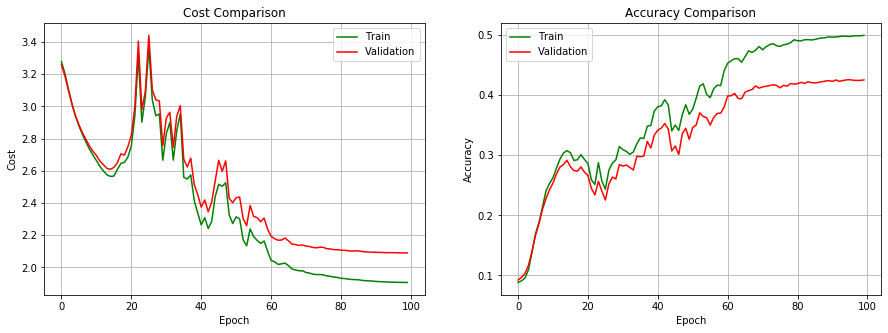

In [23]:
Train_Cyclical(network1, train_X_Norm, validation_X_Norm)

In [ ]:
np.sum(k_train == network1.train_y)/k_train.shape[0]

In [ ]:
eta = 0.001
(W2star, b2star, G) =  linearLayer2.Backward(self, N, G, H, lambda_cost, W2, eta, layer_type='hidden')
G = reluLayer.Backward(G)
N = H.shape[1]
(W1star, b1star) =  linearLayer1.Backward(self, N, G, X_batch, lambda_cost, W1, eta, layer_type='first')

In [ ]:
#### TASK - 3 ###
# Top-Level: After reading in and pre-processing the data, you can initialize the parameters of the model 
# W and b as you now know what size they should be. W has size Kxd and b is Kx1. Initialize each entry to have 
# Gaussian random values with zero mean and standard deviation .01. 
# You should use the Matlab function randn to create this data.
asgn1.Task3()

In [ ]:
#### TASK - 4 ###
# Top-level: Check the function runs on a subset of the training data given a random initialization of the 
# network's parameters: P = EvaluateClassifier(trainX(:, 1:100), W, b)
comp1 = COMPUTATIONS()
asgn1.Task4(comp1)

In [ ]:
#### TASK - 5 ###
# Write the function that computes the cost function given by equation
# J = ComputeCost(X, Y, W, b, lambda)
asgn1.Task5(comp1)

In [ ]:
#### TASK - 6 ###
# Write a function that computes the accuracy of the network's predictions given by equation(4) on a set of data.
# k = predictions
asgn1.Task6(comp1)

In [ ]:
#### TASK - 7 ###
# Write the function that evaluates, for a mini-batch, the gradients of the cost function w.r.t. W and b, 
# that is equations (10, 11).

asgn1 = Assignment1()
cifar_batch1 = CIFAR_IMAGES()
asgn1.test_batch_images(cifar_batch1)

asgn1.Task1(cifar_batch1)
asgn1.Task2()
#asgn1.Task2_test()
asgn1.Task3()
comp1 = COMPUTATIONS()
asgn1.Task4(comp1)
asgn1.Task5(comp1)
asgn1.Task6(comp1)

asgn1.Task7(comp1)

In [ ]:
asgn1.Task7_test1()

In [ ]:
asgn1.Task7_test2()

In [ ]:
#### TASK - 8 ###
# Once you have the gradient computations debugged you are now ready to write the code to perform the mini-batch 
# gradient descent algorithm to learn the network's parameters
asgn1_task8 = Assignment1()
cifar_batch1_task8 = CIFAR_IMAGES()
comp_task8 = COMPUTATIONS()

asgn1_task8.Task1(cifar_batch1_task8)
asgn1_task8.Task2()
asgn1_task8.Task3()

#GDparams = [n_batch, eta, n_epocs, lambda_cost]: 
GDparams_1 = [100, 0.1, 40, 0]
GDparams_2 = [100, 0.001, 40, 0]
GDparams_3 = [100, 0.001, 40, 0.1]
GDparams_4 = [100, 0.001, 40, 1]


In [ ]:
W_1, b_1 = asgn1_task8.Task8(comp_task8, GDparams_1)

In [ ]:
W_2, b_2 = asgn1_task8.Task8(comp_task8, GDparams_2)

In [ ]:
W_3, b_3 = asgn1_task8.Task8(comp_task8, GDparams_3)

In [ ]:
W_4, b_4 = asgn1_task8.Task8(comp_task8, GDparams_4)